<a href="https://colab.research.google.com/github/tfrizza/StyleGAN2-Tensorflow-2.0/blob/master/fashion_gen_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow-io

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import os

import tensorflow as tf
import tensorflow_io as tfio

In [2]:
DATASET_PATH = '/content/drive/My Drive/Datasets/Fashion-Gen Dataset'
TRAIN_PATH = os.path.join(DATASET_PATH, 'fashiongen_256_256_train.h5')
TRAIN_PATH

'/content/drive/My Drive/Datasets/Fashion-Gen Dataset/fashiongen_256_256_train.h5'

In [15]:
!git clone https://github.com/tfrizza/StyleGAN2-Tensorflow-2.0.git

Cloning into 'StyleGAN2-Tensorflow-2.0'...
remote: Enumerating objects: 58, done.
remote: Total 58 (delta 0), reused 0 (delta 0), pack-reused 58
Unpacking objects: 100% (58/58), done.


In [18]:
!git pull

remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 2), reused 6 (delta 2), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/tfrizza/StyleGAN2-Tensorflow-2.0
   77e0e71..a84de07  master     -> origin/master
Updating 77e0e71..a84de07
Fast-forward
 stylegan_two_refactored.py | 649 +++++++++++++++++++++++++++++++++++++++++++++
 1 file changed, 649 insertions(+)
 create mode 100644 stylegan_two_refactored.py


In [16]:
cd StyleGAN2-Tensorflow-2.0/

/content/StyleGAN2-Tensorflow-2.0


In [3]:
with h5py.File(TRAIN_PATH, 'r') as f:
    head = {}
    for k in f.keys():
        if k == 'input_image': continue
        head[k] = np.squeeze(f[k][:20])
pd.DataFrame(head)

,index,index_2,input_brand,input_category,input_composition,input_concat_description,input_department,input_description,input_gender,input_msrpUSD,input_name,input_pose,input_productID,input_season,input_subcategory
0,0,0,b'Diesel',b'SHIRTS',b'100% cotton.',b'Long sleeve coated denim shirt in indigo blu...,b'CLOTHING',b'Long sleeve coated denim shirt in indigo blu...,b'Men',375.0,b'Black Overdyed Sofier Denim Shirt',b'id_gridfs_1',86554,b'SS2014',b'SHIRTS'
1,1,1,b'Diesel',b'SHIRTS',b'100% cotton.',b'Long sleeve coated denim shirt in indigo blu...,b'CLOTHING',b'Long sleeve coated denim shirt in indigo blu...,b'Men',375.0,b'Black Overdyed Sofier Denim Shirt',b'id_gridfs_2',86554,b'SS2014',b'SHIRTS'
2,2,2,b'Diesel',b'SHIRTS',b'100% cotton.',b'Long sleeve coated denim shirt in indigo blu...,b'CLOTHING',b'Long sleeve coated denim shirt in indigo blu...,b'Men',375.0,b'Black Overdyed Sofier Denim Shirt',b'id_gridfs_3',86554,b'SS2014',b'SHIRTS'
3,3,3,b'Diesel',b'SHIRTS',b'100% cotton.',b'Long sleeve coated denim shirt in indigo blu...,b'CLOTHING',b'Long sleeve coated denim shirt in indigo blu...,b'Men',375.0,b'Black Overdyed Sofier Denim Shirt',b'id_gridfs_4',86554,b'SS2014',b'SHIRTS'
4,4,4,b'Diesel',b'SWEATERS',b'100% cotton.',b'Long sleeve sweatshirt in heather grey. Band...,b'CLOTHING',b'Long sleeve sweatshirt in heather grey. Band...,b'Women',315.0,b'Heather Grey Zipped F-Pal-A Sweatshirt',b'id_gridfs_1',86510,b'SS2014',b'HOODIES & ZIPUPS'
5,5,5,b'Diesel',b'SWEATERS',b'100% cotton.',b'Long sleeve sweatshirt in heather grey. Band...,b'CLOTHING',b'Long sleeve sweatshirt in heather grey. Band...,b'Women',315.0,b'Heather Grey Zipped F-Pal-A Sweatshirt',b'id_gridfs_2',86510,b'SS2014',b'HOODIES & ZIPUPS'
6,6,6,b'Diesel',b'SWEATERS',b'100% cotton.',b'Long sleeve sweatshirt in heather grey. Band...,b'CLOTHING',b'Long sleeve sweatshirt in heather grey. Band...,b'Women',315.0,b'Heather Grey Zipped F-Pal-A Sweatshirt',b'id_gridfs_3',86510,b'SS2014',b'HOODIES & ZIPUPS'
7,7,7,b'Diesel',b'SWEATERS',b'100% cotton.',b'Long sleeve sweatshirt in heather grey. Band...,b'CLOTHING',b'Long sleeve sweatshirt in heather grey. Band...,b'Women',315.0,b'Heather Grey Zipped F-Pal-A Sweatshirt',b'id_gridfs_4',86510,b'SS2014',b'HOODIES & ZIPUPS'
8,8,8,b'Diesel',b'JEANS',"b'98% cotton, 2% elastane.'",b'Skinny-fit jeans in indigo. Turquoise overdy...,b'CLOTHING',b'Skinny-fit jeans in indigo. Turquoise overdy...,b'Women',265.0,b'Indigo & Turquoise Overdye Grupee Jeans',b'id_gridfs_1',86507,b'SS2014',b'JEANS'
9,9,9,b'Diesel',b'JEANS',"b'98% cotton, 2% elastane.'",b'Skinny-fit jeans in indigo. Turquoise overdy...,b'CLOTHING',b'Skinny-fit jeans in indigo. Turquoise overdy...,b'Women',265.0,b'Indigo & Turquoise Overdye Grupee Jeans',b'id_gridfs_2',86507,b'SS2014',b'JEANS'


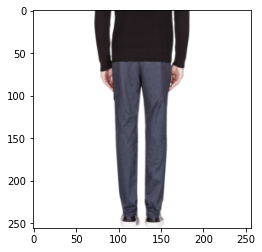

In [56]:
plt.imshow(f['input_image'][17])

In [11]:
def h5_gen():
    with h5py.File(TRAIN_PATH, 'r') as hf:
        for im in hf["input_image"]:
            yield im

def train_preprocess(image):
    image /= 255

    #Make sure the image is still in [0, 1]
    # image = tf.clip_by_value(image, 0.0, 1.0)

    return image

In [20]:
N_TRAIN_IMGS = 260480
BATCH_SIZE = 32

dataset = tf.data.Dataset.from_generator(
     h5_gen,
     (tf.int64),
     (tf.TensorShape([256,256,3]))
)

# Shuffle, repeat, batch     
# dataset = dataset.shuffle(N_TRAIN_IMGS)     
dataset = dataset.map(train_preprocess, num_parallel_calls=4)
dataset = dataset.repeat()
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(1)
dataset

<PrefetchDataset shapes: (None, 256, 256, 3), types: tf.float64>

In [21]:
import importlib
import stylegan_two_refactored
importlib.reload(stylegan_two_refactored)

<module 'stylegan_two_refactored' from '/content/StyleGAN2-Tensorflow-2.0/stylegan_two_refactored.py'>

In [22]:
model = stylegan_two_refactored.StyleGAN(dataset, lr = 0.0001, silent = False)
model.evaluate(0)

while model.GAN.steps < 1001:
    model.train()

TypeError: ignored